<a href="https://colab.research.google.com/github/auab/Customer-Analysis/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 


Understand the costumer is very important for any company, from these who creates the product to the ones who creates the advertises. In the customer-centric culture, the data plays a big role in this process of knowing the client and one technique used in this task is the **customer segmentation**.

The idea of this project is to create a customer segmentation using a dataset avaiable in kaggle, describe the steps taken and choices made  and discuss the obtained result.

## Segmentation
<strong><em>Definition</strong>: Segmentation is a process of taxonomy, a way to divide something into parts, a way to divide market into sub-markets</em>

Here we'll use data to define the numbers of segments and how they are divided, but it could also be done by a business rule, like *highest use*, *medium use* and *low use* of a specific product.

### Why segement?
It was said in the beginning that a segmentation is important to understand the customer, but how it can be used? *Grigsby* (2018) lists thre typical uses of segmentation: finding similar members, making modelling better and using marketing strategy to attack each segment differently.

Know the prupose of the segmentation is important for the steps that will be taken and for the results discussion. Here we'll consider that the result of the segmentation will be used for marketing strategy, more specifically, they want to raise the wine consumption, and to do so, they want to know how the costumers are segmented, and how could be a good way to approach them.

## The dataset
The dataset used here was extracted from Kaggle and it's available (with data description) in <a href="https://www.kaggle.com/imakash3011/customer-personality-analysis">here</a>. I also made it available the <a href='https://github.com/auab/Customer-Analysis'>github repository</a> of this project

### Dataset description

The database is divided in three types of features: 
* **People**: it contains mainly demographic features
* **Products**: the ammount spent in a specific product category in the last two years
* **Promotion**: the customer response to promotions campaings
* **Places**: the place where the customer buys the product

The deatiled description including the features names is presented below:


**People**

ID: Customer's unique identifier<br />
Year_Birth: Customer's birth year<br />
Education: Customer's education level<br />
Marital_Status: Customer's marital status<br />
Income: Customer's yearly household income<br />
Kidhome: Number of children in customer's household<br />
Teenhome: Number of teenagers in customer's household<br />
Dt_Customer: Date of customer's enrollment with the company<br />
Recency: Number of days since customer's last purchase<br />
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br /><br />

**Products**

MntWines: Amount spent on wine in last 2 years<br />
MntFruits: Amount spent on fruits in last 2 years<br />
MntMeatProducts: Amount spent on meat in last 2 years<br />
MntFishProducts: Amount spent on fish in last 2 years<br />
MntSweetProducts: Amount spent on sweets in last 2 years<br />
MntGoldProds: Amount spent on gold in last 2 years<br /><br />


**Promotion**


NumDealsPurchases: Number of purchases made with a discount<br />
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br />
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br />
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br />
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br />
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br />
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br /><br />


**Place**


NumWebPurchases: Number of purchases made through the company’s website<br />
NumCatalogPurchases: Number of purchases made using a catalogue<br />
NumStorePurchases: Number of purchases made directly in stores<br />
NumWebVisitsMonth: Number of visits to company’s website in the last month

# Initial Imports

In [139]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

In [99]:
customer_data = pd.read_csv('https://raw.githubusercontent.com/auab/Customer-Analysis/main/marketing_campaign.csv',sep='\t')
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Exploratory Analysis


## Clean the data: NAs and Outliers

The first step is see if there are NA variables and outliers. Depending on how many they are, a differente approach will be used to deal with it.

In [100]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The analysis show that the **Income** column has NA, values. Since they are not so many, the treatment choosen here is simply drop the rows.

In [101]:
customer_data=customer_data.dropna(subset=['Income'])

A way to observe if there are outlier instances is to plot histograms and analyze how they are depicted. The expected format for a graph without outliers is an historgram with bars very close to each other ocuppying almost all the x-axis intervals presented in the figure (assuming that the x-axis range was set considering the max. and min. value of the feature).

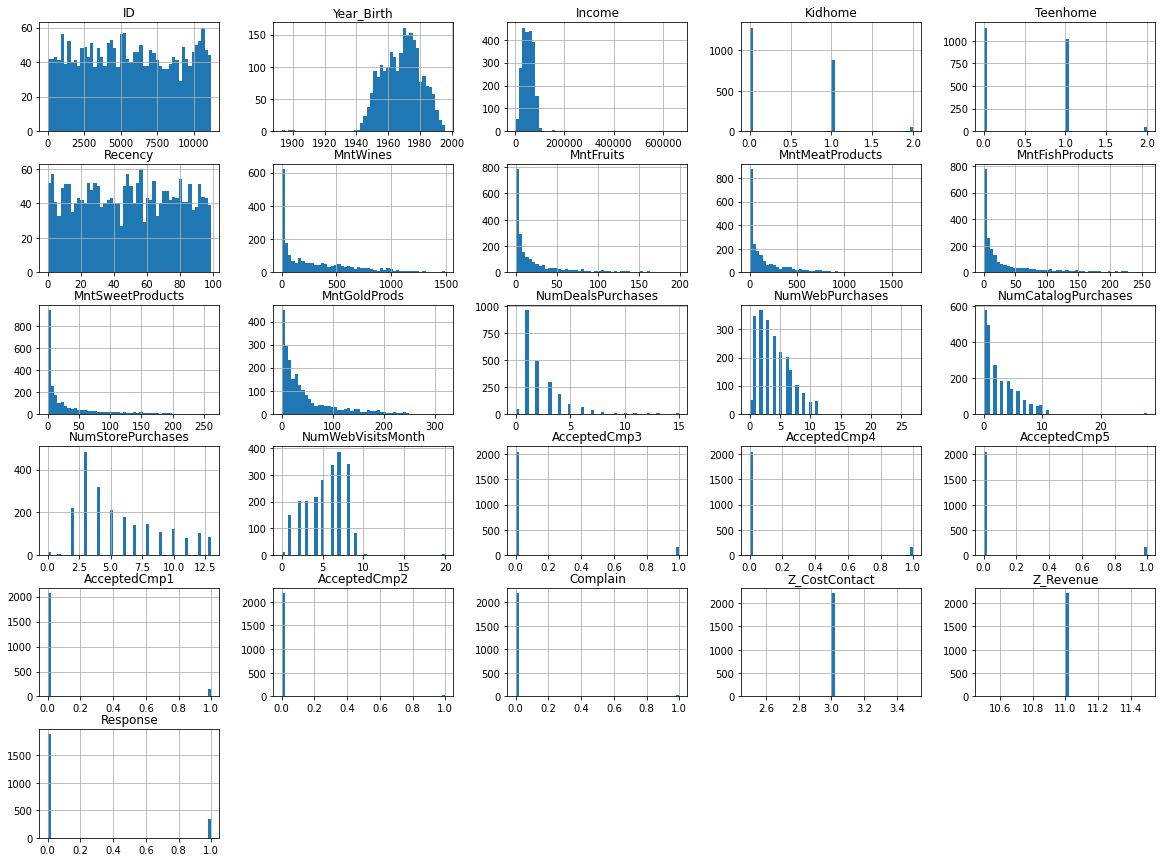

In [102]:
customer_data.hist(bins=50, figsize=(20,15))
plt.show()

Such graphs indicates different treatments for each case. Each feature demands a new graph to understand the situation. Let's start with Year_Birth

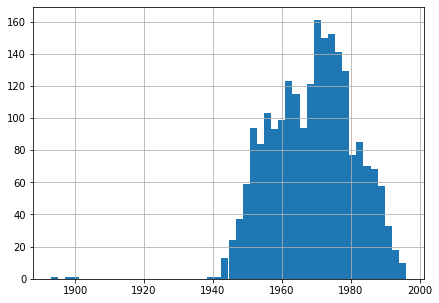

There are 3 abnormal birth years


In [103]:
customer_data['Year_Birth'].hist(bins=50, figsize=(7,5))
plt.show()
abnormal_birth_year = len(customer_data[customer_data['Year_Birth']<1910])
print('There are '+str(abnormal_birth_year)+' abnormal birth years')

Since there are only 3 values, we can drop the instances without great harm.

In [104]:
customer_data = customer_data[customer_data['Year_Birth']>1910]

The next is Income:

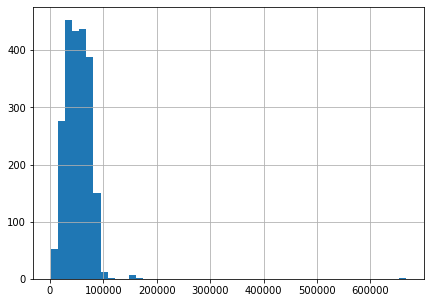

There are 1 abnormal income values


In [105]:
customer_data['Income'].hist(bins=50, figsize=(7,5))
plt.show()
abnormal_income = len(customer_data[customer_data['Income']>600000])
print('There are '+str(abnormal_income)+' abnormal income values')

Only 1 instance. Drop again.

In [106]:
customer_data = customer_data[customer_data['Income']<600000]

Then come the *Products* features, which can be analyzed together:

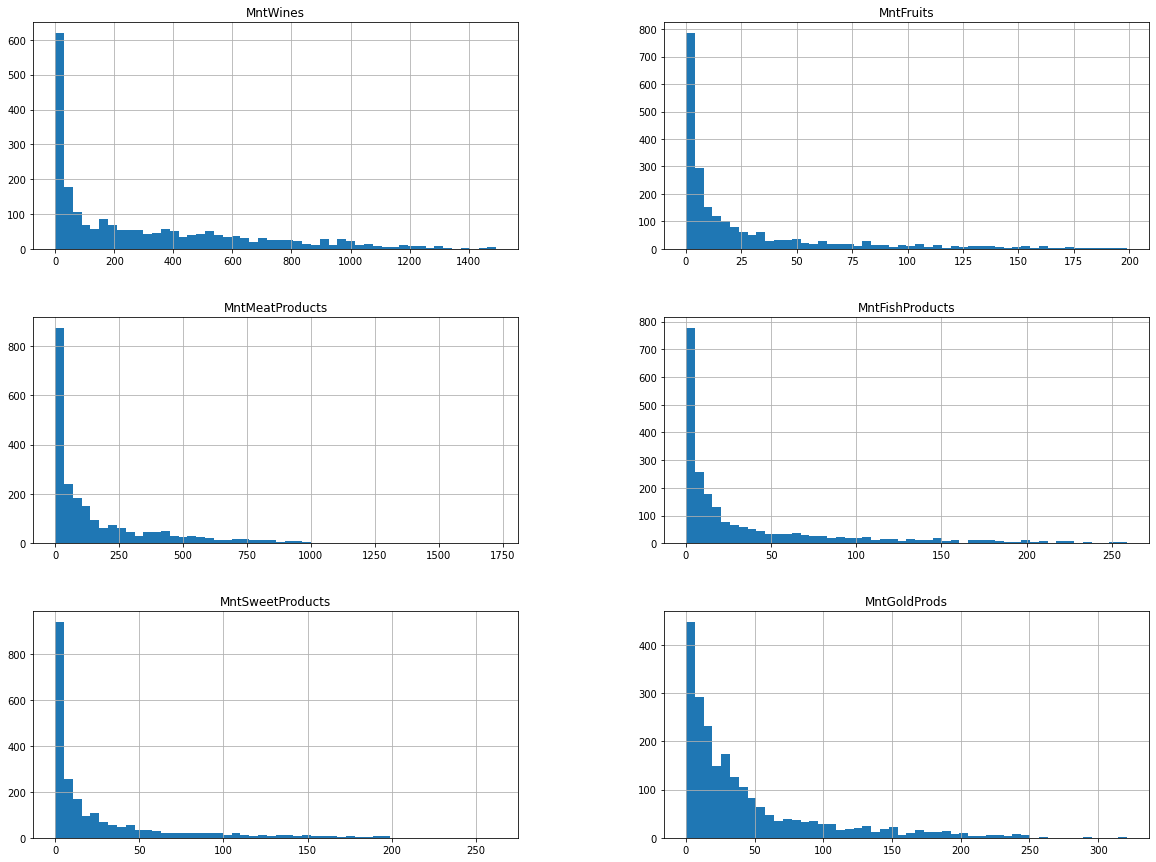

In [107]:
filter_products_col = [col for col in customer_data if col.startswith('Mnt')]
customer_data[filter_products_col].hist(bins=50, figsize=(20,15))
plt.show()

Only meat and sweetproducts present instances far from the others, than these will be removed

In [108]:
customer_data = customer_data[customer_data['MntSweetProducts']<200]
customer_data = customer_data[customer_data['MntMeatProducts']<1000]

The *Purchase* features will be droped following the same idea

In [109]:
customer_data = customer_data[customer_data['NumWebPurchases']<15]
customer_data = customer_data[customer_data['NumCatalogPurchases']<15]
customer_data = customer_data[customer_data['NumWebVisitsMonth']<15]

The features *AcceptedCmp2* and *Complain* are binary variables with low number of '1' values. Depending on how low it is, it is better to drop the whole column.

In [110]:
customer_data['AcceptedCmp2'].value_counts()

0    2169
1      30
Name: AcceptedCmp2, dtype: int64

In [111]:
customer_data['Complain'].value_counts()

0    2179
1      20
Name: Complain, dtype: int64

These values represent less than 2% of the total number of instances, so these columns will be droped, and so will be the Z_CostContact and Z_Revenue, because all the instances have the same value, meaning nothing for the segmentation process

In [112]:
customer_data.drop(['Complain','AcceptedCmp2','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

Here is the final result:

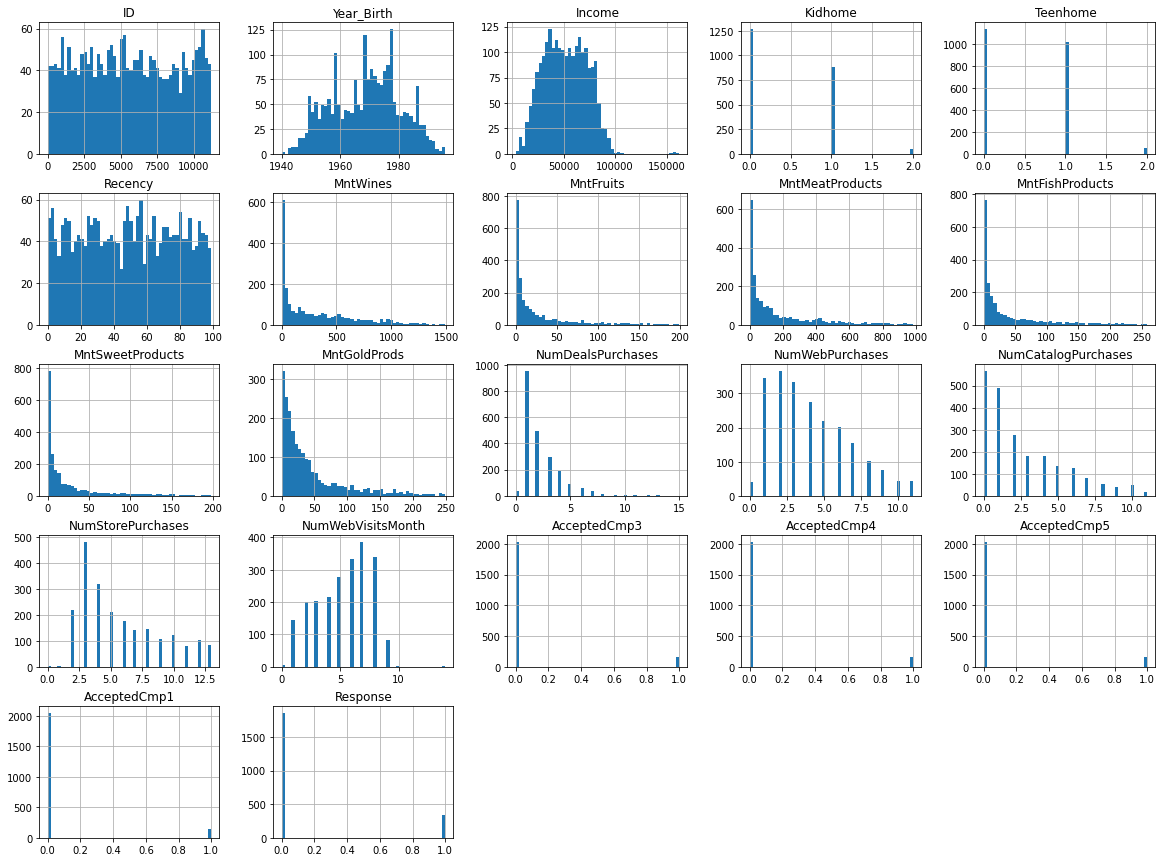

In [113]:
customer_data.hist(bins=50, figsize=(20,15))
plt.show()

## Clean the data: Object Variables

For the moment, it is enough to list the variables and see from which categories they are composed. In next steps, these categories can be simplified.

In [114]:
education_categories = customer_data['Education'].value_counts()
marital_categories = customer_data['Marital_Status'].value_counts()
print(education_categories,'\n\n\n',marital_categories)

Graduation    1110
PhD            473
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64 


 Married     852
Together    568
Single      466
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


The other *object* column refers to a date type, wchich will further be converted

## Transform the data: Variable creation and modification

Here we'll start with the columns refering to dates, namely *Year_Birth* and *Dt_Customer* being replaced by other meaningful variables (Age and Client_Seniority, respectively). We'll consider the date from data extraction: 04/10/2014. 

In [115]:
last_date = datetime.date(2014,10, 4)
customer_data['Seniority']=pd.to_datetime(customer_data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
customer_data['Seniority'] = pd.to_numeric(customer_data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
customer_data['Age']= 2014-customer_data['Year_Birth']

Then we aggregate some column values to create new ones.

In [116]:
#Aggregate the ammount spended
customer_data['Spending'] = customer_data[filter_products_col].sum(axis=1)
#Aggregate the number of purchases
filter_purchases_col = [col for col in customer_data if col.endswith('Purchases')]
customer_data['NumPurchases'] = customer_data[filter_purchases_col].sum(axis=1)
#Aggregate the number of kids
customer_data['Childrenhome']=customer_data['Teenhome']+customer_data['Kidhome']
#Aggregate accepted campaigns
filter_campaing_accept_col = [col for col in customer_data if col.startswith('AcceptedCmp')]
customer_data['Num_accpt_campaings'] = customer_data[filter_campaing_accept_col].sum(axis=1)

After this, we simplify the columns with categories. We don't want too many categories, specially if they have low number of instances.

In [117]:
customer_data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'},inplace=True)
customer_data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'},inplace=True)

In [118]:
customer_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response,Seniority,Age,Spending,NumPurchases,Childrenhome,Num_accpt_campaings
0,5524,1957,Postgraduate,Alone,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,1,25,57,1617,25,0,0
1,2174,1954,Postgraduate,Alone,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,7,60,27,6,2,0
2,4141,1965,Postgraduate,In couple,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,14,49,776,21,0,0
3,6182,1984,Postgraduate,In couple,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,8,30,53,8,1,0
4,5324,1981,Postgraduate,In couple,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,9,33,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Postgraduate,In couple,61223,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,16,47,1341,18,1,0
2236,4001,1946,Postgraduate,In couple,64014,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,4,68,444,22,3,1
2237,7270,1981,Postgraduate,Alone,56981,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,8,33,1241,19,0,1
2238,8235,1956,Postgraduate,In couple,69245,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,8,58,843,23,1,0


In [119]:
enc1 = OneHotEncoder(handle_unknown='ignore')
marital_1hot = enc1.fit_transform(customer_data[['Marital_Status']])
marital_1hot_array = marital_1hot.toarray()
hot_df = pd.DataFrame(marital_1hot_array,columns=enc1.categories_,index=customer_data.index)
customer_data = customer_data.join(hot_df)
enc2 = OneHotEncoder(handle_unknown='ignore')
education_1hot = enc1.fit_transform(customer_data[['Education']])
education_1hot_array = marital_1hot.toarray()
hot_df = pd.DataFrame(education_1hot_array,columns=enc1.categories_,index=customer_data.index)
customer_data = customer_data.join(hot_df)

In [120]:
column_names= customer_data.columns
customer_data.rename(columns={column_names[-4]: "Alone", column_names[-3]: "In couple",column_names[-2]:"Postgraduate",column_names[-1]:"Undergraduate"},inplace=True)


And finally we drop the columns with overlapping information.

In [121]:
customer_data.drop(['Teenhome','Kidhome','Dt_Customer','Year_Birth','AcceptedCmp1','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Education','Marital_Status','In couple','Undergraduate','ID'],axis=1,inplace=True)

In [158]:
customer_data

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Seniority,Age,Spending,NumPurchases,Childrenhome,Num_accpt_campaings,Alone,Postgraduate,Winepct,Cluster
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,25,57,1617,25,0,0,1,1,0,Need attention
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,7,60,27,6,2,0,1,1,0,High potential
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,14,49,776,21,0,0,0,0,1,Leaky bucket
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,8,30,53,8,1,0,0,0,0,High potential
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,9,33,422,19,1,0,0,0,0,High potential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223,46,709,43,182,42,118,247,2,9,3,4,5,16,47,1341,18,1,0,0,0,1,Need attention
2236,64014,56,406,0,30,0,0,8,7,8,2,5,7,4,68,444,22,3,1,0,0,1,Leaky bucket
2237,56981,91,908,48,217,32,12,24,1,2,3,13,6,8,33,1241,19,0,1,1,1,1,Leaky bucket
2238,69245,8,428,30,214,80,30,61,2,6,5,10,3,8,58,843,23,1,0,0,0,1,Leaky bucket


Now we'll create newfeatures to make easier the next steps

## Data Analysis

Until this point, the steps made did not considered our main goal. Doing so, we created a dataset that can be used for multiple objectives. Nevertheless, in order to create a more sharp analysis, we'll focus on our goal.



## Which variables are more correlated with wine consumption?

One possiblity is to consider my whole dataset to make the clusterization. Another possibility is to run a PCA Analysis to reduce dimensions of the problem and generates the cluster using a low number of features.<br>
Both approaches have a disadvantage: the loss of interpretability.
Though this models could lead to better comparison metrics, it could make difficult to know what each segment is exactly.<br>
To tackle this, we'll pick the three variables most correlated with the wine spending, and with they, we'll make the clusterization, so the results will be interpretable. Finally, we'll make our conclusion for the marketing team.<br>
Wel'll see this correlation in two ways: one considering the variable that we already have, the *MntWines*. The other considering the percentage spended in wine considering the total spending (here called 'Winepct') 

In [159]:
customer_data.corr()['MntWines'].sort_values(ascending=False)

MntWines               1
Spending               1
NumPurchases           1
Income                 1
NumCatalogPurchases    1
NumStorePurchases      1
MntMeatProducts        1
NumWebPurchases        1
Num_accpt_campaings    1
Winepct                0
MntGoldProds           0
MntFishProducts        0
MntSweetProducts       0
MntFruits              0
Seniority              0
Age                    0
NumDealsPurchases      0
Recency                0
Postgraduate           0
Alone                  0
NumWebVisitsMonth     -0
Childrenhome          -0
Name: MntWines, dtype: float64

In [160]:
customer_data['Winepct']= customer_data['MntWines']/customer_data['Spending']
customer_data.corr()['Winepct'].sort_values(ascending=False)

Winepct                1
MntWines               0
NumWebPurchases        0
Income                 0
NumPurchases           0
Age                    0
NumStorePurchases      0
NumDealsPurchases      0
Childrenhome           0
Spending               0
Num_accpt_campaings    0
NumCatalogPurchases    0
NumWebVisitsMonth      0
Seniority             -0
Recency               -0
Postgraduate          -0
Alone                 -0
MntGoldProds          -0
MntMeatProducts       -0
MntSweetProducts      -0
MntFruits             -0
MntFishProducts       -0
Name: Winepct, dtype: float64

As expected, the correlation coefficients for the *MntWines* are higher than the one for *Winepct*. This happens because the former is an **extensible variable**, and it will be strong correlated with other **extensible variable** like spending and income. Another interesting thing is that the correlation can change for positive to negative correlated for each case. The ammount spended in other products is positive correlated with *MntWines*, though it's negative correlated them (if you spend more in wine, you spend less in other products). We could go further with one of the two, and could call initially the difference of *'Unerdestand the wine spenders'* and *'Understand the wine lovers'*. For this moment, we'll keep the first one.

Though we kept the same variable that we had before, it's important to highlight the possibilities we didn't take for further analysis, clusterizations and align what is done in this study and what is expected by the marketing team.

For our clusterization, we'll consider the properties *MntWines*, *Spending*, *NumPurchases* and *Income*

In [125]:
customer_data_reduced = customer_data[['MntWines','Spending','NumPurchases','Income']]
#customer_data_reduced = customer_data[['Spending','NumPurchases','Income']]
#customer_data_reduced = customer_data

# Clustering

Now it's time to segmentate the data. Here, we'll use the k-means model, and to use it properly, we'll scale the data that will be used in the model

In [126]:
scaler = MinMaxScaler()
scaler.fit(customer_data_reduced)
customer_data_reduced_scaled = scaler.transform(customer_data_reduced)

## Number of clusters

Now, we have to estabilish a criterium to choose the numbers of cluester. For this, we'll use the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html'>silhouette_score</a>, presented in scikit-learn. We'll run tests for k=3 to k=8

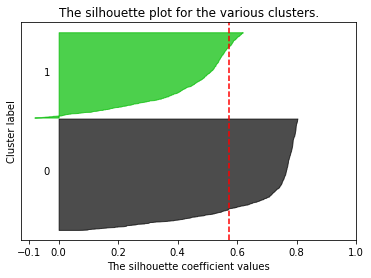

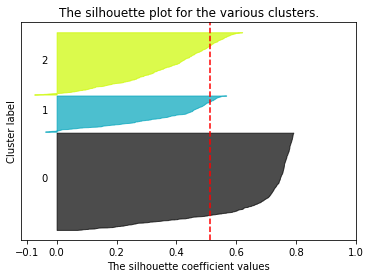

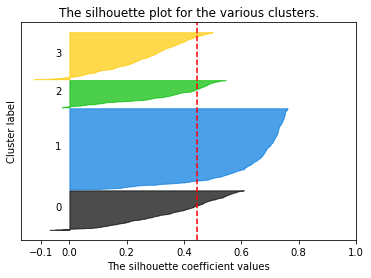

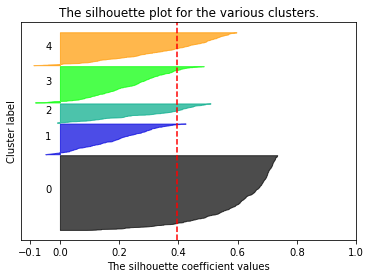

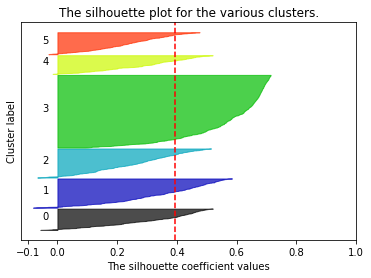

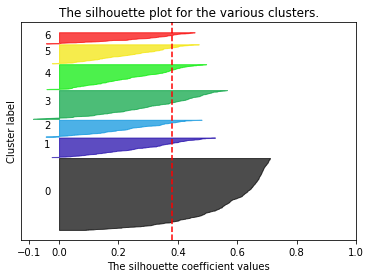

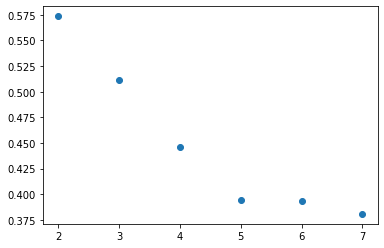

In [127]:
k_scores=[]
for k in range(2,8):
  kmeans = KMeans(n_clusters=k,random_state=42)
  y_pred = kmeans.fit_predict(customer_data_reduced_scaled)
  k_score = silhouette_score(customer_data_reduced_scaled, kmeans.labels_)
  k_scores.append(k_score)

  fig, ax = plt.subplots()
  sample_silhouette_values = silhouette_samples(customer_data_reduced_scaled, y_pred)
  y_lower = 10
  for i in range(k):    
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax.set_title("The silhouette plot for the various clusters.")
  ax.set_xlabel("The silhouette coefficient values")
  ax.set_ylabel("Cluster label")
  # The vertical line for average silhouette score of all the values
  ax.axvline(x=k_score, color="red", linestyle="--")

  ax.set_yticks([])  # Clear the yaxis labels / ticks
  ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

#the silhouette_scores
plt.scatter(range(2,8),k_scores)
plt.show()

What we can conclude from this analysis? In a first moment, that the higher is the number of clusters, the lower is the silhouette score, meaning that the instances are very close from the other. From 2 to 5 clusters the value decreases considerably in each increment. After this, it becomes almost stable.<br>
Watching the silhouette diagrams we can see that in all cases there is a cluster bigger and with higher silhouette score. The thinner *blades* have a silhouette value decreasing too fast, meaning a not good clusterization.<br>
The segmentation with two and three clusters give the better results. Here, we'll keep the analysis with three clusters.

In [162]:
kmeans = KMeans(n_clusters=3,random_state=42)
y_pred = kmeans.fit_predict(customer_data_reduced_scaled)

## Clusters Visualization and Naming

In [163]:
y_str = [str(y) for y in y_pred]
y_str
fig = px.scatter_3d(customer_data, x='Income', y='Spending', z='NumPurchases',
              color=list(y_str))
fig.show()

In [128]:
scaler=StandardScaler()
dataset_temp=customer_data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
customer_data = customer_data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

pd.options.display.float_format = "{:.0f}".format
summary=customer_data[['Income','Spending','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             625           458             530    586
       mean            38091         72962           69295  34723
       std             11964         12494           11349  11890
       min              4861         49090           44802   3502
       25%             29478         65231           60695  26488

In [138]:
PLOT = go.Figure()

PLOT.add_trace(go.scatter_3d(x = customer_data['Income'],
                            y = customer_data['Seniority'],
                            z = customer_data['Spending'],                        
                            mode = 'markers',marker_size = 6, marker_line_width = 1,ids=y_pred
                            ))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

AttributeError: ignored

# Data Preparation for Customer Personality Analysis

Now I will prepare the data for the Apriori algorithm. Here I will be defining three segments of the customers according to the age, income and seniority:

In [94]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
customer_data['Age_group'] = pd.cut(customer_data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
customer_data['Income_group'] = pd.qcut(customer_data['Income'], q=4, labels=cut_labels_Income)
#Create Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
customer_data['Seniority_group'] = pd.qcut(customer_data['Seniority'], q=4, labels=cut_labels_Seniority)
customer_data=customer_data.drop(columns=['Age','Income','Seniority'])

Now I will define new segments according to the spending of customers on each product which will be based on:

Non Buyer

Low Buyer

Frequent Buyer

Biggest Buyer

In [95]:
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
customer_data['Wines_segment'] = pd.qcut(customer_data['Wines'][customer_data['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Fruits_segment'] = pd.qcut(customer_data['Fruits'][customer_data['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Meat_segment'] = pd.qcut(customer_data['Meat'][customer_data['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Fish_segment'] = pd.qcut(customer_data['Fish'][customer_data['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Sweets_segment'] = pd.qcut(customer_data['Sweets'][customer_data['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data['Gold_segment'] = pd.qcut(customer_data['Gold'][customer_data['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
customer_data.replace(np.nan, "Non consumer",inplace=True)
customer_data.drop(columns=['Spending','Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
customer_data = customer_data.astype(object)

KeyError: ignored

# Apriori Algorithm

The Apriori algorithm is the simplest technique to identify the underlying relationships between different types of elements. The idea behind this algorithm is that all nonempty subsets of a frequent category must also be frequent. Here I will be using the Apriori algorithm for the task of customer personality analysis with Python. Here I will use this algorithm to identify the biggest customer of wines:

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
association=customer_data.copy() 
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

product='Wines'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9357,"(Cluster_Need attention, Education_Postgraduate, Age_group_Mature)",(Wines_segment_Biggest consumer),0.121,0.249,0.084,0.698,2.805,0.054,2.486
4858,"(Income_group_High income, Cluster_Need attention)",(Wines_segment_Biggest consumer),0.121,0.249,0.084,0.697,2.800,0.054,2.476
4854,"(Cluster_Need attention, Age_group_Mature)",(Wines_segment_Biggest consumer),0.130,0.249,0.090,0.692,2.782,0.058,2.439
4872,"(Seniority_group_Old customers, Cluster_Need attention)",(Wines_segment_Biggest consumer),0.123,0.249,0.085,0.691,2.779,0.054,2.433
9385,"(Cluster_Need attention, Meat_segment_Biggest consumer, Education_Postgraduate)",(Wines_segment_Biggest consumer),0.122,0.249,0.081,0.664,2.670,0.051,2.237


Conclusion
So according to the output and overall analysis conducted on this data science project on customer personality analysis with Python, we can conclude that the biggest customers of wines are:

Customers with an average income of around $69,500.

Customers with an average total spend of approximately $1,252.

Customers registered with the company for approximately 21 months.

Customers with a graduate degree.

And customers who are also heavy consumers of meat products.

# Bibliography

Grigsby, M. (2018). Marketing Analytics: A Practical Guide to Improving Consumer Insights Using Data Techniques. Kogan Page Publishers.